# water softener signal detection Test
writen by : amenallah salem¹

 Test Goal:

writing an algorithm wich count the number of occurrences of water softener running over the course 


 amenallah.salem@dauphine.eu/ amenallah.salem@dauphine.tn 
 

## Data preprocessing & data visualisation 


In [0]:
#Importing packages
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.dates as md
import seaborn as sns
%matplotlib inline

In [176]:
dataLink = 'https://raw.githubusercontent.com/amenallah-salem/waterSoftenerTest/master/expot.csv'
#import the data set with simple two columns 
data = pd.read_csv(dataLink, usecols=['timestamp','pulses'], parse_dates=['timestamp'])
#visualize the first 5 rows 
data.head()


,timestamp,pulses
0,2019-03-01 00:00:00,0
1,2019-03-01 00:06:00,1
2,2019-03-01 00:12:00,0
3,2019-03-01 00:18:00,0
4,2019-03-01 00:24:00,0


In [177]:
#see the data shape 
data.shape

(87520, 2)

In [178]:
#check if we have missing value
data.isnull().values.any()

False

In [179]:
#check if we have a duplicated rows
data.duplicated().any()

False

In [180]:
#some statistics
data.describe()

,pulses
count,87520.000000
mean,1.136426
std,1.843377
min,0.000000
25%,0.000000
50%,0.000000
75%,2.000000
max,25.000000


In [181]:
data.dtypes

timestamp    datetime64[ns]
pulses                int64
dtype: object

Text(0.5, 1.0, 'pulses in time function')

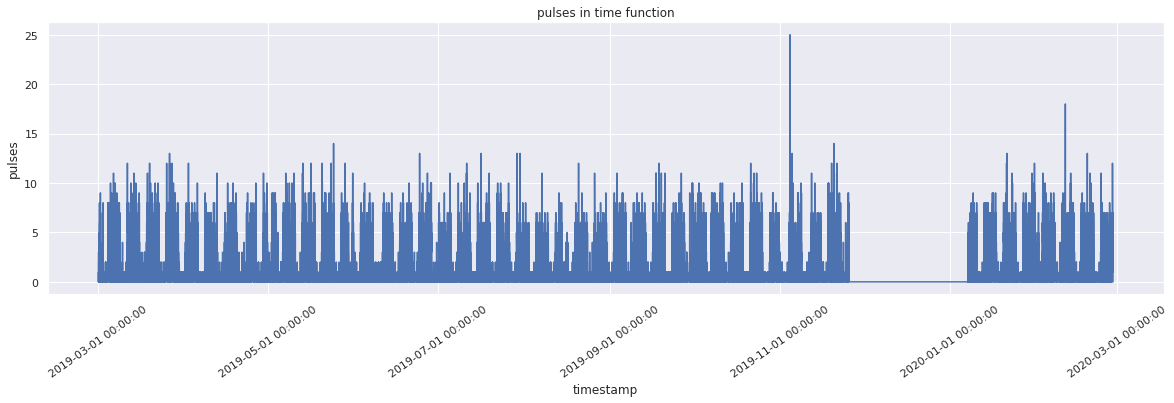

In [182]:
#data plot as a time series graph 

sns.set()
f, (ax1) = plt.subplots(1, figsize=(20,5))
ax1.plot(data['timestamp'], data["pulses"] )
plt.xticks( rotation=35 )
xfmt = md.DateFormatter('%Y-%m-%d %H:%M:%S')
ax1.xaxis.set_major_formatter(xfmt)
ax1.set_xlabel("timestamp", fontsize=12)
ax1.set_ylabel("pulses")
ax1.set_title("pulses in time function")

In [0]:
#we see a huge gap in the data we will keep it to a further (investigation) discuttion 

## Water softner occurrence 

We are going to write an algorithme that will count the number of times a water softner occure. we will make a data restriction in wich the timestamp always starts from 1AM and ends 5AM. the basic modelisation is to map the data restriction seraching for a two short and high water usage and contains in the middle a long and continuous water usage. 

In [0]:
#make a copy of the data and add a column with hour number
data2 = data.copy()
data2['Hour'] = data2.timestamp.map(lambda x : x.hour)
data2['Weekday'] = data2['timestamp'].dt.day_name()


In [0]:
#restrict the data between 3AM and 5AM
data2 = data2[(data2['Hour'] >=1 )&(data2['Hour'] < 3 )]

In [0]:
#reset the index for later porpous to print the time intervall 
data2 = data2.reset_index(drop=True, inplace=False)


In [187]:
#define new data_length
data2_len=len(data2['timestamp'])
data2_len

7300

In [188]:

#now let's put all pulses values in a numpy array and display it's shape 
pulses_array=np.array(data2['pulses'])
pulses_array


array([0, 1, 0, ..., 0, 0, 0])

In [189]:
#display all possible values for pulses 
pulses_val  = set(pulses_array)
pulses_val

{0, 1, 2, 3, 4, 5}

In [0]:
#initialize an occurence list that will contain indexex in witch the water softner occures  
occ_list=[] 
#we make a for loop on the data2 , we will make a 2 rows skip. 

for idx in range(2,data2_len): 
  #initialise a list that will contain a single water softner  
  P=[] 
  if pulses_array[idx-1]<pulses_array[idx-2] and pulses_array[idx-1]==pulses_array[idx] and pulses_array[idx]!=0: 
    peak=idx -2
    P.append(peak) 
    P.append(peak + 1)
    P.append(peak + 2)
    peak+=2 
    
    while pulses_array[peak]>=pulses_array[peak+1]: #we abord the condition that pulse_array[peak +2] !=
      P.append(peak + 1)                            #because we might have some discontinuity 
      peak+=1                                       # in the water flow P.append(peak + 1)
       
    else : # ie pulses_array[peak] < pulses_array[peak+1] <= pulses_array[peak+2] :
      P.append(peak + 2)
      P.append(peak + 3)
      peak +=1

           
      occ_list.append(P)  

In [191]:
occ_list

[[7, 8, 9, 10, 11, 12, 13, 15, 16],
 [147, 148, 149, 150, 151, 152, 153, 155, 156],
 [288, 289, 290, 291, 292, 294, 295],
 [428, 429, 430, 431, 432, 433, 434, 436, 437],
 [568, 569, 570, 571, 572, 574, 575],
 [707, 708, 709, 710, 712, 713],
 [847, 848, 849, 850, 851, 852, 853, 854, 856, 857],
 [987, 988, 989, 990, 991, 992, 993, 994, 996, 997],
 [1127, 1128, 1129, 1130, 1131, 1132, 1133, 1134, 1136, 1137],
 [1268, 1269, 1270, 1271, 1272, 1273, 1274, 1276, 1277],
 [1408, 1409, 1410, 1411, 1412, 1413, 1414, 1416, 1417],
 [1547, 1548, 1549, 1550, 1551, 1553, 1554],
 [1827, 1828, 1829, 1830, 1831, 1832, 1833, 1834, 1836, 1837],
 [1970, 1971, 1972, 1973, 1974, 1976, 1977],
 [2247, 2248, 2249, 2250, 2251, 2252, 2253, 2255, 2256],
 [2662, 2663, 2664, 2666, 2667]]

In [192]:
print('the number of occurence of water softner is', len(occ_list))

the number of occurence of water softner is 16


In [193]:
print('water softner has occured between these times ')
for x in range(0, len(occ_list)):
  print(data2.timestamp.loc[occ_list[x][0]]  ,'and', data2.timestamp.loc[occ_list[x][-1]])

water softner has occured between these times 
2019-03-01 01:42:00 and 2019-03-01 02:36:00
2019-03-08 01:42:00 and 2019-03-08 02:36:00
2019-03-15 01:48:00 and 2019-03-15 02:30:00
2019-03-22 01:48:00 and 2019-03-22 02:42:00
2019-03-29 01:48:00 and 2019-03-29 02:30:00
2019-04-05 01:42:00 and 2019-04-05 02:18:00
2019-04-12 01:42:00 and 2019-04-12 02:42:00
2019-04-19 01:42:00 and 2019-04-19 02:42:00
2019-04-26 01:42:00 and 2019-04-26 02:42:00
2019-05-03 01:48:00 and 2019-05-03 02:42:00
2019-05-10 01:48:00 and 2019-05-10 02:42:00
2019-05-17 01:42:00 and 2019-05-17 02:24:00
2019-05-31 01:42:00 and 2019-05-31 02:42:00
2019-06-07 02:00:00 and 2019-06-07 02:42:00
2019-06-21 01:42:00 and 2019-06-21 02:36:00
2019-07-12 01:12:00 and 2019-07-12 01:42:00
